# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
city_url = url + "&q=" + city
city_weather = requests.get(city_url).json()
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -49.35, 'lon': 70.2167},
 'dt': 1722813057,
 'id': 1546102,
 'main': {'feels_like': 25,
          'grnd_level': 1005,
          'humidity': 66,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 35.4,
          'temp_max': 35.4,
          'temp_min': 35.4},
 'name': 'Port-aux-Français',
 'sys': {'country': 'TF', 'sunrise': 1722825742, 'sunset': 1722859671},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 223, 'gust': 20.96, 'speed': 18.01}}


In [8]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(0.1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | la tuque
Processing Record 4 of Set 1 | hastings
Processing Record 5 of Set 1 | vilyuysk
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | taroa
Processing Record 11 of Set 1 | chimore
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | xilin hot
Processing Record 14 of Set 1 | kievka
Processing Record 15 of Set 1 | giyani
Processing Record 16 of Set 1 | kitimat
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | mizhhirya
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | kavaratti
Processing Record 22 of Set 1 | hwange
Processing Record

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,50.74,74,70,1.01,AU,1722813057
1,albany,42.6001,-73.9662,81.45,74,44,1.01,US,1722813057
2,la tuque,47.4334,-72.7824,67.89,77,93,3.56,CA,1722813057
3,hastings,50.8552,0.5729,61.09,86,72,10.18,GB,1722813057
4,vilyuysk,63.7553,121.6247,63.03,50,96,7.65,RU,1722813057


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,50.74,74,70,1.01,AU,1722813057
1,albany,42.6001,-73.9662,81.45,74,44,1.01,US,1722813057
2,la tuque,47.4334,-72.7824,67.89,77,93,3.56,CA,1722813057
3,hastings,50.8552,0.5729,61.09,86,72,10.18,GB,1722813057
4,vilyuysk,63.7553,121.6247,63.03,50,96,7.65,RU,1722813057


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

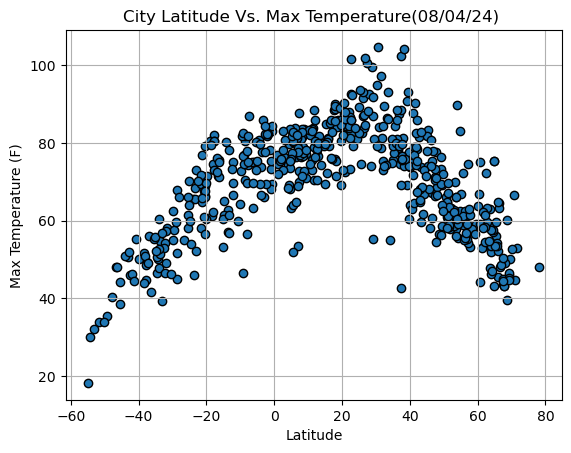

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],
           city_data_df['Max Temp'], edgecolor='black', linewidth=1, marker='o',
           alpha=1, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s) " % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

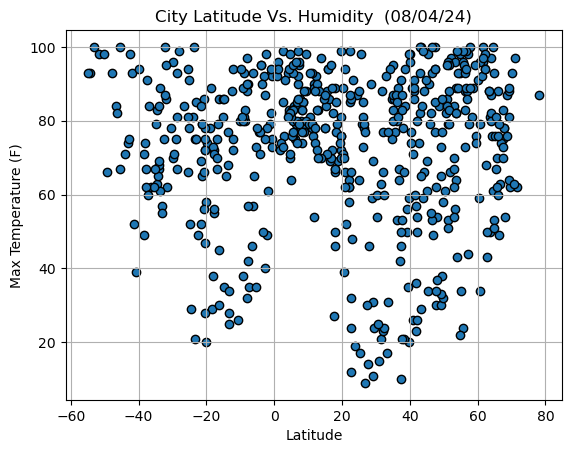

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],
           city_data_df['Humidity'], edgecolor='black', linewidth=1, marker='o',
           alpha=1, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude Vs. Humidity  ({time.strftime("%x")})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

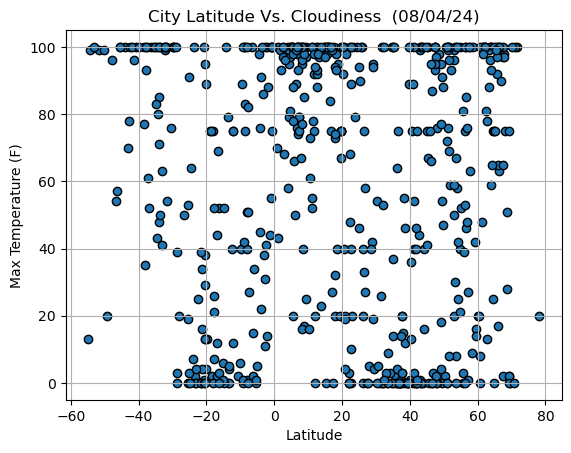

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],
           city_data_df['Cloudiness'], edgecolor='black', linewidth=1, marker='o',
           alpha=1, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude Vs. Cloudiness  ({time.strftime("%x")})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

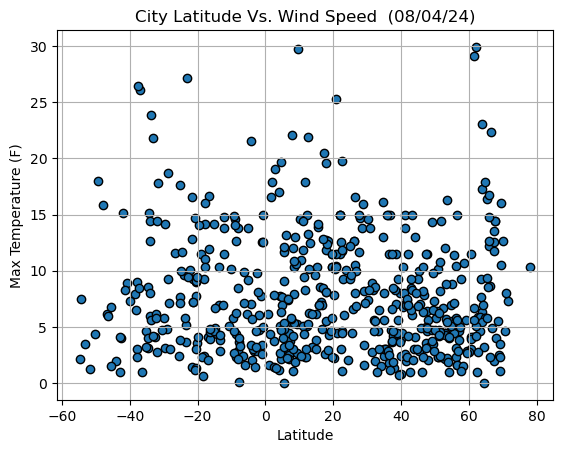

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],
           city_data_df['Wind Speed'], edgecolor='black', linewidth=1, marker='o',
           alpha=1, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude Vs. Wind Speed  ({time.strftime("%x")})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, ylabel, xlabel, hemisphere):
        
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    date_now = (time.strftime("%x"))
   
    
    coords = ((min(x) + max(x))/2)
    val = ((min(regress_values) + max(regress_values))/2)  
    
    plt.title(f"{hemisphere} Hemisphere - {xlabel} vs {ylabel} ({date_now})",fontsize = 15)
    plt.scatter(x,y, edgecolor='black', linewidth=1, marker='o', alpha=0.5,)
    plt.plot(x, regress_values, "black")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
   
    print(f"The r-squared is: {rvalue}")
    plt.annotate(line_eq, (coords + 3, val + 3), fontsize=15, color="black")
    plt.show()


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,81.45,74,44,1.01,US,1722813057
2,la tuque,47.4334,-72.7824,67.89,77,93,3.56,CA,1722813057
3,hastings,50.8552,0.5729,61.09,86,72,10.18,GB,1722813057
4,vilyuysk,63.7553,121.6247,63.03,50,96,7.65,RU,1722813057
5,wailua homesteads,22.0669,-159.3780,83.19,64,0,14.97,US,1722813057


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,50.74,74,70,1.01,AU,1722813057
6,waitangi,-43.9535,-176.5597,50.83,71,100,1.99,NZ,1722813058
7,bredasdorp,-34.5322,20.0403,46.62,63,43,8.55,ZA,1722813058
10,chimore,-16.9833,-65.1333,75.04,75,44,4.09,BO,1722813058
11,adamstown,-25.0660,-130.1015,70.34,78,91,17.60,PN,1722813058


###  Temperature vs. Latitude Linear Regression Plot

In [26]:
# Important information, since we are using live information that changes consisitently, the display of the Linear Regression will be displayed
# in the middle right portion of the graph to make sure that it appears no matter what information you are using. Otherwise the display could not appear
# based on the current information and text coords(50, 75) used.

The r-squared is: -0.6532545050136449


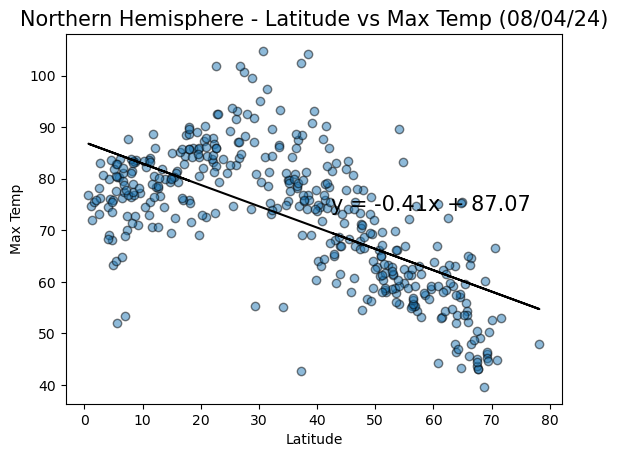

In [27]:
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_regress(x, y, "Max Temp", "Latitude", "Northern")


The r-squared is: 0.8417228114043246


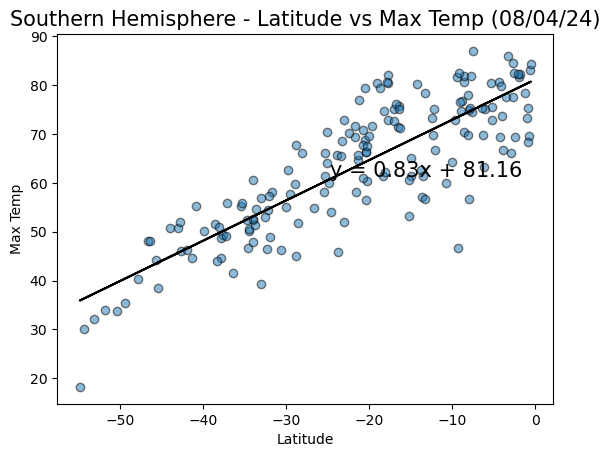

In [28]:
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_regress(x, y, "Max Temp", "Latitude",  "Southern")

For the Max Temp category between the Northern and Southern Hemisphere, There is a positive correlation for the Southern Hemisphere and a negative correlation for the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.06277195180727368


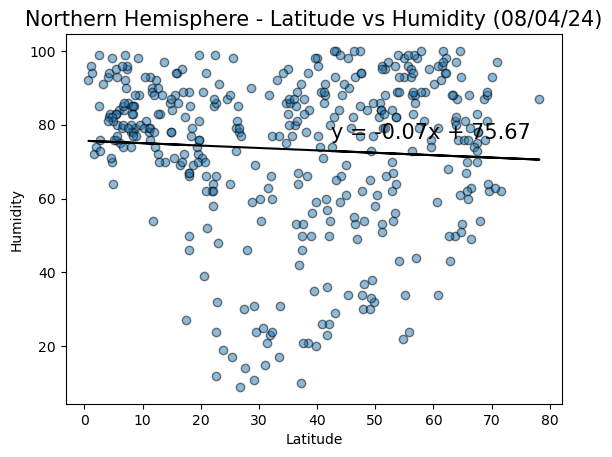

In [31]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_regress(x, y, "Humidity", "Latitude",  "Northern")

The r-squared is: -0.12840729211967264


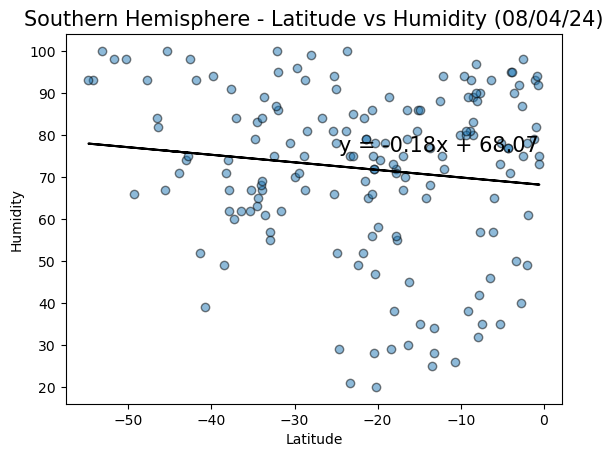

In [32]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_regress(x, y, "Humidity", "Latitude",  "Southern")


For the Humidity category between the Northern and Southern Hemisphere, There is no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.16452602390141816


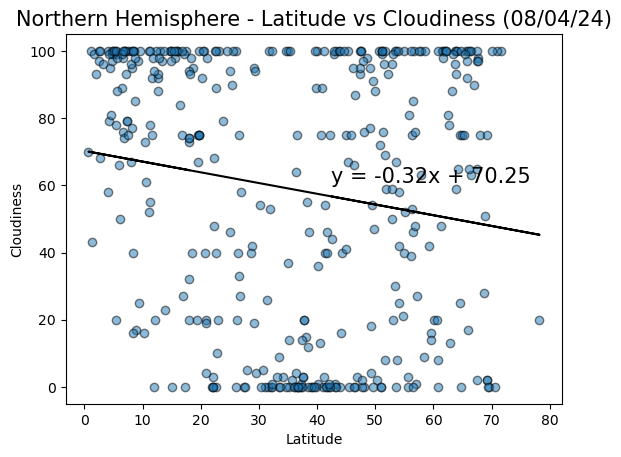

In [35]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_regress(x, y, "Cloudiness", "Latitude",  "Northern")

The r-squared is: -0.2746016610868474


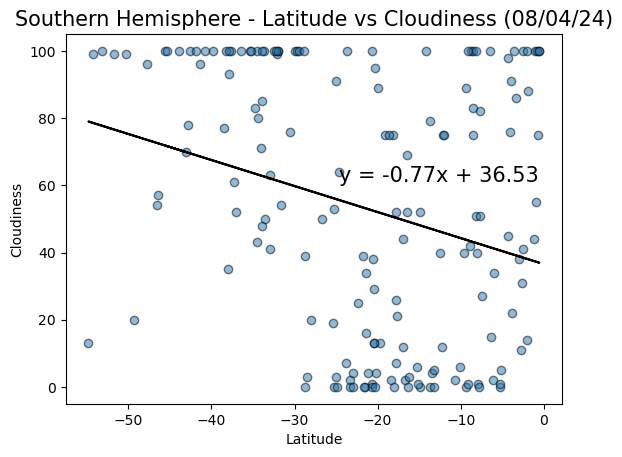

In [36]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_regress(x, y, "Cloudiness", "Latitude", "Southern")

For the Cloudiness category between the Northern and Southern Hemisphere, There is no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.06289116690576217


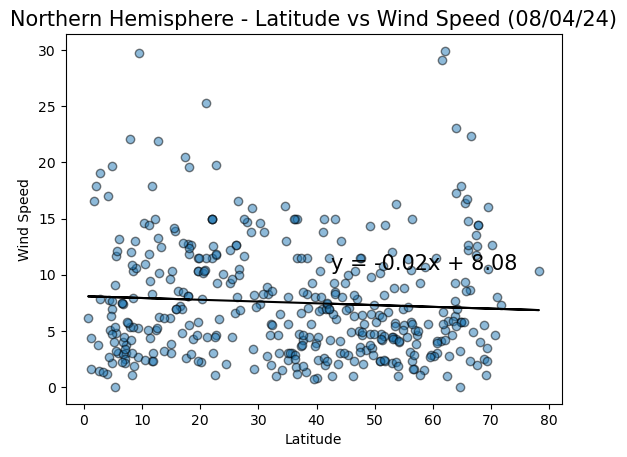

In [39]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_regress(x, y, "Wind Speed", "Latitude", "Northern")

The r-squared is: -0.0667528463723492


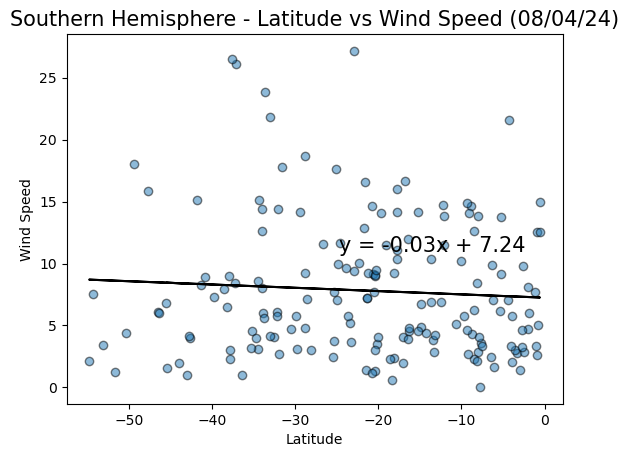

In [40]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_regress(x, y, "Wind Speed", "Latitude", "Southern")

For the Wind Speed category between the Northern and Southern Hemisphere, There is no correlation.